# Exercício 05 - Implementação da Fase Forward

Aluno: Frederico Luis de Azevedo

Professor: Dr. Francisco de Assis Boldt

## Introdução

Neste exercício será implementado uma rede neural com a arquitetura da fase Forward de um problema XOR 

## Bibliotecas e Inicialização

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, ClassifierMixin
from matplotlib.colors import ListedColormap

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore")

np.random.seed(1)

## Base de dados

Para este exercício será construída uma base de dados com duas características e quatro registros (variações) de cada racacterística da operação XOR

In [2]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]]
)

y = np.array([0, 1,
              1, 0])

## Implementação da Rede Neural XOR (fase Forward)

In [3]:
class NeuralNetwork(BaseEstimator, ClassifierMixin):
    
    def __init__(self):
        
        self.weights = []
   
    def fit(self, weights):
        self.weights = weights
        
    def predict(self, X):
        
        result = []
        
        for x in X:
            
            a1 = np.concatenate((np.ones(1).T, np.array(x)))
        
            r1 = np.dot(a1, self.weights[0])
            z1 = self._sigmoid(r1)
            
            r2 = np.dot(z1, self.weights[1])
            z2 = self._sigmoid(r2)

            result.append(z2)
        
        return np.array(result)
        
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

## Execução do Classificador

In [4]:
ann = NeuralNetwork()

In [5]:
w1 = np.array(
    [[ 2.8435415, -1.2562144, -6.9845415 ],
     [-4.3874120, 5.89784543, 5.06178712],
     [-4.9894561, 5.2514771, 4.21455517]])

w2  = np.array(
    [[-5.97813254],
     [ 4.98751411],
     [-8.98485487]]).reshape(3, 1)

weights = [w1, w2]

ann.fit(weights)

y_pred = ann.predict(X)
print('Input:\n', X)
print('-----------------')
print('Predictions:\n', y_pred)

Input:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
-----------------
Predictions:
 [[0.01043409]
 [0.97683286]
 [0.93945035]
 [0.03987075]]


## Plotando o Meshgrid

In [6]:
def plot_meshgrid(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


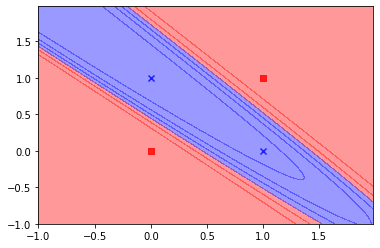

In [7]:
plot_meshgrid(X,y,ann)